<a href="https://colab.research.google.com/github/MukRodrigues/Projetos-Python/blob/main/An%C3%A1lise_equilibrio_blower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de estabilidade do modelo de Blower (2000)

$$
\begin{cases}
\displaystyle \frac{dX}{dt} &= \pi - \mu X(t) - c(1+i)\lambda(t)X(t) \\[6pt]
\displaystyle  \frac{dY_U}{dt} &= c(1+i)\lambda(t)X(t) - (\nu_U + \mu)Y_U(t) - \sigma Y_U(t) + g Y_T(t) \\[6pt]
\displaystyle  \frac{dY_T}{dt} &= \sigma Y_U(t) - (\nu_T + \mu)Y_T(t) - g Y_T(t).
\end{cases}
$$

### 1. Ausência de infecção

O ponto de equilíbrio é:
$$
\bar{X} = \dfrac{\pi}{\mu}, \bar{Y}_U = \bar{Y}_T  = 0.
$$

In [46]:
import sympy as sp

def analisar_estabilidade(pi, mu, c, i, vU, vT, g, sigma, betaU, betaT):
    # Variáveis simbólicas
    X, YU, YT = sp.symbols('X, YU, YT')
    Lambda = (betaU * YU + betaT * YT) /  (X + YU + YT)

    # Equações do modelo
    dX = pi - mu*X - c*(1+i)* Lambda * X
    dYU = c*(1+i)* Lambda * X - (vU + mu)*YU - sigma*YU + g*YT
    dYT = sigma*YU - (vT + mu)*YT -   g*YT
    # Vetor de variáveis e funções
    Y = sp.Matrix([X, YU, YT ])
    F = sp.Matrix([dX, dYU, dYT ])

    # Jacobiano geral
    J = F.jacobian(Y)

    # Ponto de equilíbrio livre de infecção
    X_star = pi / mu
    subs_eq = {X: X_star, YU: 0, YT: 0 }

    # Jacobiano no equilíbrio
    J_star = J.subs(subs_eq)

    # Autovalores numéricos
    eigenvals = [complex(ev.evalf()) for ev in J_star.eigenvals().keys()]

    # Verificar estabilidade
    estabilidade = all(ev.real < 0 for ev in eigenvals)

    print("Jacobiano no equilíbrio:\n", sp.N(J_star))
    print("\nAutovalores:")
    for ev in eigenvals:
        print(f"  {ev:.4f}")

    if estabilidade:
        print("\n✅ O equilíbrio é ESTÁVEL (todas as partes reais < 0).")
    else:
        print("\n⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).")

    return eigenvals, estabilidade

# ============================
# Exemplo de uso
# ============================
# pi, mu, c, i, vU, vT, g, sigma, betaU, betaT - retirados do livro do Troy
params = {
    'pi': 2133,
    'mu': 1/30,
    'c': 1.7 ,
    'i': 2 , #com exceção desse parâmetro aqui que é o numero de parceiros
    'vU':1/12 ,
    'vT':1/27 ,
    'g':0.05 ,
    'sigma':0.5 ,
    'betaU': 0.1 ,
    'betaT': 0.025
}

analisar_estabilidade(**params)


Jacobiano no equilíbrio:
 Matrix([[-0.0333333333333333, -0.510000000000000, -0.127500000000000], [0, -0.106666666666667, 0.177500000000000], [0, 0.500000000000000, -0.120370370370370]])

Autovalores:
  -0.0333+0.0000j
  0.1845+0.0000j
  -0.4115+0.0000j

⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).


([(-0.03333333333333333+0j),
  (0.18446964882005168+0j),
  (-0.4115066858570887+0j)],
 False)

### 2. Equilíbrio endêmico (incidência da doença de forma contínua):

O ponto de equilíbrio endêmico é dado por
$$
\bar{X} = \dfrac{\pi }{\mu + c(1+i)\lambda(t)},  \quad \bar{Y}_U = \dfrac{v_T+\mu+g}{ \sigma }\bar{Y}_T
$$
onde
$$
\bar{Y}_T = \dfrac{ \pi \sigma c(1+i)\lambda(t) }{ (\mu + c(1+i)\lambda(t)) ((v_U+\mu)(v_U+\mu +g+\sigma)     -\sigma g)     }
$$




In [47]:
import sympy as sp

def analisar_estabilidade(pi, mu, c, i, vU, vT, g, sigma, betaU, betaT):
    # Variáveis simbólicas
    X, YU, YT = sp.symbols('X, YU, YT')
    N = 10**3
    Lambda = pi/N # (betaU * YU + betaT * YT) /  (X + YU + YT)  ## por simplicidade vou considerar contante!!

    # Equações do modelo
    dX = pi - mu*X - c*(1+i)* Lambda * X
    dYU = c*(1+i)* Lambda * X - (vU + mu)*YU - sigma*YU + g*YT
    dYT = sigma*YU - (vT + mu)*YT -   g*YT
    # Vetor de variáveis e funções
    Y = sp.Matrix([X, YU, YT ])
    F = sp.Matrix([dX, dYU, dYT ])

    # Jacobiano geral
    J = F.jacobian(Y)

    # Ponto de equilíbrio infecção endemica
    YT_star =  ( c *(i+1)*Lambda * sigma * pi )/((mu + c *(i+1)*Lambda) * (vU+mu) * (vU+mu +g+sigma) - sigma* g)
    YU_star = ( vT + mu + g)* YT_star / sigma
    #Lambda_star = (betaU * YU_star + betaT * YT_star) / (  X_star+  YU_star + YT_star)
    X_star = pi / (mu + c*(1+i) *Lambda   )


    subs_eq = {X: X_star, YU: YU_star, YT: YT_star }

    # Jacobiano no equilíbrio
    J_star = J.subs(subs_eq)

    # Autovalores numéricos
    eigenvals = [complex(ev.evalf()) for ev in J_star.eigenvals().keys()]

    # Verificar estabilidade
    estabilidade = all(ev.real < 0 for ev in eigenvals)

    print("Jacobiano no equilíbrio:\n", sp.N(J_star))
    print("\nAutovalores:")
    for ev in eigenvals:
        print(f"  {ev:.4f}")

    if estabilidade:
        print("\n✅ O equilíbrio é ESTÁVEL (todas as partes reais < 0).")
    else:
        print("\n⚠️ O equilíbrio é INSTÁVEL (alguma parte real > 0).")

    return eigenvals, estabilidade

# ============================
# Exemplo de uso
# ============================
# pi, mu, c, i, vU, vT, g, sigma, betaU, betaT - retirados do livro do Troy
params = {
    'pi': 2133,
    'mu': 1/30,
    'c': 1.7 ,
    'i': 12 , #com exceção desse parâmetro aqui que é o numero de parceiros
    'vU':1/12 ,
    'vT':1/27 ,
    'g':0.05 ,
    'sigma':0.5 ,
    'betaU': 0.1 ,
    'betaT': 0.025
}

analisar_estabilidade(**params)


Jacobiano no equilíbrio:
 Matrix([[-47.1726333333333, 0, 0], [47.1393000000000, -0.616666666666667, 0.0500000000000000], [0, 0.500000000000000, -0.120370370370370]])

Autovalores:
  -47.1726+0.0000j
  -0.6628+0.0000j
  -0.0743+0.0000j

✅ O equilíbrio é ESTÁVEL (todas as partes reais < 0).


([(-47.17263333333333+0j),
  (-0.6627590721975709+0j),
  (-0.07427796483946618+0j)],
 True)

### Jacobiano

In [10]:
pi, mu, c, i, vU, vT, g, sigma, betaU, betaT = sp.symbols('pi, mu, c, i, vU, vT, g, sigma, betaU, betaT')
X, YU, YT = sp.symbols('X, YU, YT')
Lambda = (betaU * YU + betaT * YT) /  (X + YU + YT)  ## por simplicidade vou considerar contante!!

# Equações do modelo
dX = pi - mu*X - c*(1+i)* Lambda * X
dYU = c*(1+i)* Lambda * X - (vU + mu)*YU - sigma*YU + g*YT
dYT = sigma*YU - (vT + mu)*YT -   g*YT
# Vetor de variáveis e funções
Y = sp.Matrix([X, YU, YT ])
F = sp.Matrix([dX, dYU, dYT ])

# Jacobiano geral
J = F.jacobian(Y)

In [13]:
J

Matrix([
[X*c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU)**2 - c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU) - mu,                  -X*betaU*c*(i + 1)/(X + YT + YU) + X*c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU)**2,    -X*betaT*c*(i + 1)/(X + YT + YU) + X*c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU)**2],
[    -X*c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU)**2 + c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU), X*betaU*c*(i + 1)/(X + YT + YU) - X*c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU)**2 - mu - sigma - vU, X*betaT*c*(i + 1)/(X + YT + YU) - X*c*(i + 1)*(YT*betaT + YU*betaU)/(X + YT + YU)**2 + g],
[                                                                                                      0,                                                                                                  sigma,                                                                             -g - mu - vT]])

In [26]:
#sp.solve([pi - mu*X - c*(1+i)* Lambda * X, c*(1+i)* Lambda * X - (vU + mu)*YU - sigma*YU + g*YT, sigma*YU - (vT + mu)*YT -   g*YT],[X, YU, YT])

## Gráfico do Sistema



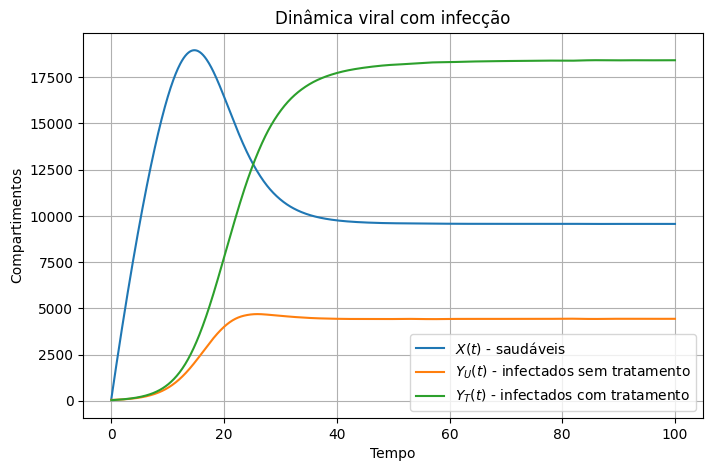

In [48]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros
pi =2133
mu =1/30
c=1.7
i=3
vU=1/12
vT=1/27
g=0.05
sigma=0.5
betaU=0.1
betaT = 0.025

# Equações do modelo
def virus_model(t, y):
    X, YU, YT = y
    Lambda = (betaU * YU + betaT * YT) /  (X + YU + YT)
    dX = pi - mu*X - c*(1+i)* Lambda * X
    dYU = c*(1+i)* Lambda * X - (vU + mu)*YU - sigma*YU + g*YT
    dYT = sigma*YU - (vT + mu)*YT -   g*YT
    return [dX, dYU, dYT]

# Condições iniciais
y0 = [100, 50, 30]
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Resolver o sistema
sol = solve_ivp(virus_model, t_span, y0, t_eval=t_eval)

# Plotar
plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], label='$X(t)$ - saudáveis')
plt.plot(sol.t, sol.y[1], label='$Y_U(t)$ - infectados sem tratamento')
plt.plot(sol.t, sol.y[2], label='$Y_T(t)$ - infectados com tratamento')
plt.xlabel('Tempo')
plt.ylabel('Compartimentos')
plt.legend()
plt.title('Dinâmica viral com infecção')
plt.grid(True)
plt.show()
